In [35]:
import numpy as np
import pandas as pd
import yaml
import pyarrow.parquet as pq
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units

In [36]:
config = 'config.yml'
with open(config) as f:
    conf = yaml.load(f, yaml.FullLoader)

df = pd.read_parquet(conf['data_path'])

In [ ]:
arr = list(df.columns)
for i in range(20):
    print(arr[i])

In [45]:
file = pq.ParquetFile(conf['data_path'])
metadata = file.metadata
# metadata.row_group(0).column(14)

In [ ]:
file.schema

In [5]:
df

,datetime,lat,lon,report_count,ra_percent,sn_percent,pl_percent,fzra_percent,CFRZR_-,CICEP_-,CRAIN_-,CSNOW_-,DEWPOINT_2M_C,DEWPOINT_DEPRES_2M_C,EL_HGT_m,HGT_1000_m,HGT_100_m,HGT_125_m,HGT_150_m,HGT_175_m,HGT_200_m,HGT_225_m,HGT_250_m,HGT_275_m,HGT_300_m,HGT_325_m,HGT_350_m,HGT_375_m,HGT_400_m,HGT_425_m,HGT_450_m,HGT_475_m,HGT_500_m,HGT_525_m,HGT_550_m,HGT_575_m,HGT_600_m,HGT_625_m,HGT_650_m,HGT_675_m,...,VGRD_m/s_9750_m,VVEL_1000_Pa/s,VVEL_100_Pa/s,VVEL_125_Pa/s,VVEL_150_Pa/s,VVEL_175_Pa/s,VVEL_200_Pa/s,VVEL_225_Pa/s,VVEL_250_Pa/s,VVEL_275_Pa/s,VVEL_300_Pa/s,VVEL_325_Pa/s,VVEL_350_Pa/s,VVEL_375_Pa/s,VVEL_400_Pa/s,VVEL_425_Pa/s,VVEL_450_Pa/s,VVEL_475_Pa/s,VVEL_500_Pa/s,VVEL_525_Pa/s,VVEL_550_Pa/s,VVEL_575_Pa/s,VVEL_600_Pa/s,VVEL_625_Pa/s,VVEL_650_Pa/s,VVEL_675_Pa/s,VVEL_700_Pa/s,VVEL_725_Pa/s,VVEL_750_Pa/s,VVEL_775_Pa/s,VVEL_800_Pa/s,VVEL_825_Pa/s,VVEL_850_Pa/s,VVEL_875_Pa/s,VVEL_900_Pa/s,VVEL_925_Pa/s,VVEL_950_Pa/s,VVEL_975_Pa/s,idx,day
0,2013-01-01 00:00:00,30.744,-95.586,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.343658,-272.837494,6332.087402,130.927994,16409.566406,15072.472656,13958.511719,13005.371094,12177.664062,11424.750000,10732.558594,10093.656250,9496.753906,8937.335938,8410.593750,7912.273438,7439.582031,6989.183594,6558.664062,6149.011719,5758.078125,5382.500000,5023.554688,4676.335938,4343.332031,4019.600098,3707.762695,3404.764893,...,27.065833,-0.023980,0.022361,-0.013806,0.008793,0.064256,-0.031020,-0.190585,-0.388002,-0.498363,-0.538474,-0.546176,-0.530499,-0.511599,-0.472294,-0.457566,-0.449751,-0.478218,-0.527970,-0.576692,-0.653756,-0.687458,-0.735026,-0.798881,-0.832609,-0.835734,-0.845971,-0.795730,-0.715640,-0.600325,-0.501293,-0.404310,-0.421718,-0.455880,-0.418937,-0.350637,-0.271945,-0.133685,"[91, 242]",2013-01-01
1,2013-01-01 00:00:00,31.458,-109.606,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.218842,-267.712494,3736.337646,183.802994,16263.941406,14872.597656,13708.886719,12709.121094,11841.039062,11073.375000,10378.183594,9739.406250,9147.128906,8595.710938,8079.968750,7595.648438,7139.332031,6708.058594,6299.539062,5911.761719,5541.828125,5188.250000,4848.304688,4520.210938,4203.582031,3897.100098,3600.387695,3312.889893,...,27.728254,0.132270,-0.071389,-0.076306,0.040043,0.189256,0.250230,0.215665,0.236998,0.345387,0.461526,0.422574,0.250751,0.113401,-0.034794,-0.113816,-0.168501,-0.196968,-0.215470,-0.232942,-0.185006,-0.156208,-0.110026,-0.017631,0.073641,0.133016,0.216529,0.329270,0.440610,0.524675,0.529957,0.439440,0.234532,0.137870,0.143563,0.118113,0.103055,0.116315,"[102, 143]",2013-01-01
2,2013-01-01 00:00:00,34.290,-93.060,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.718658,-272.462494,5669.087402,145.177994,16328.816406,14972.347656,13860.636719,12914.871094,12080.914062,11328.500000,10638.433594,10000.156250,9405.378906,8849.085938,8325.593750,7830.023438,7359.582031,6912.183594,6485.164062,6078.761719,5691.203125,5320.625000,4966.179688,4623.335938,4293.707031,3972.350098,3662.137695,3360.764893,...,26.229106,0.038520,0.022361,0.079944,0.040043,0.001756,-0.031020,-0.034335,-0.106752,-0.185863,-0.225974,-0.202426,-0.249249,-0.355349,-0.503544,-0.551316,-0.512251,-0.353218,-0.184220,-0.014192,0.002494,-0.062458,-0.297526,-0.580131,-0.926359,-1.241984,-1.533471,-1.701980,-1.746890,-1.631575,-1.407543,-1.123060,-0.765468,-0.424630,-0.106437,0.086863,0.196805,0.147565,"[120, 259]",2013-01-01
3,2013-01-01 00:00:00,36.741,-104.502,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-8.593842,-270.399994,6470.087402,137.177994,16199.691406,14778.222656,13603.386719,12601.746094,11726.664062,10949.625000,10249.933594,9611.656250,9023.253906,8477.460938,7969.093750,7493.648438,7047.707031,6628.183594,6230.289062,5850.636719,5485.453125,5133.125000,4792.929688,4464.335938,4146.707031,3839.725098,3542.262695,3254.014893,...,30.155935,-0.023980,-0.040139,0.048694,0.071293,0.033006,-0.062270,-0.221835,-0.325502,-0.342113,-0.350974,-0.327426,-0.249249,-0.199099,-0.159794,-0.145066,-0.168501,-0.196968,-0.246720,-0.264192,-0.185006,-0.1

In [6]:
df[conf['tempvars']]

,TEMP_C_0_m,TEMP_C_10000_m,TEMP_C_1000_m,TEMP_C_10250_m,TEMP_C_10500_m,TEMP_C_10750_m,TEMP_C_11000_m,TEMP_C_11250_m,TEMP_C_11500_m,TEMP_C_11750_m,TEMP_C_12000_m,TEMP_C_12250_m,TEMP_C_12500_m,TEMP_C_1250_m,TEMP_C_12750_m,TEMP_C_13000_m,TEMP_C_13250_m,TEMP_C_13500_m,TEMP_C_13750_m,TEMP_C_14000_m,TEMP_C_14250_m,TEMP_C_14500_m,TEMP_C_14750_m,TEMP_C_15000_m,TEMP_C_1500_m,TEMP_C_15250_m,TEMP_C_15500_m,TEMP_C_15750_m,TEMP_C_16000_m,TEMP_C_16250_m,TEMP_C_16500_m,TEMP_C_1750_m,TEMP_C_2000_m,TEMP_C_2250_m,TEMP_C_2500_m,TEMP_C_250_m,TEMP_C_2750_m,TEMP_C_3000_m,TEMP_C_3250_m,TEMP_C_3500_m,TEMP_C_3750_m,TEMP_C_4000_m,TEMP_C_4250_m,TEMP_C_4500_m,TEMP_C_4750_m,TEMP_C_5000_m,TEMP_C_500_m,TEMP_C_5250_m,TEMP_C_5500_m,TEMP_C_5750_m,TEMP_C_6000_m,TEMP_C_6250_m,TEMP_C_6500_m,TEMP_C_6750_m,TEMP_C_7000_m,TEMP_C_7250_m,TEMP_C_7500_m,TEMP_C_750_m,TEMP_C_7750_m,TEMP_C_8000_m,TEMP_C_8250_m,TEMP_C_8500_m,TEMP_C_8750_m,TEMP_C_9000_m,TEMP_C_9250_m,TEMP_C_9500_m,TEMP_C_9750_m
0,14.088295,-40.604655,15.242883,-42.561195,-44.476000,-46.387680,-48.257693,-50.127706,-52.121415,-54.402378,-56.683341,-58.661587,-59.896332,13.754340,-61.131077,-62.365822,-62.297204,-62.199969,-62.102735,-62.199055,-63.268139,-64.337223,-65.406307,-66.475391,12.138116,-67.035365,-67.387502,-67.739639,-68.091776,-68.443914,-68.796051,10.827350,9.481775,7.857431,6.310024,14.706776,4.942813,3.582216,2.000678,0.340917,-1.164754,-2.605774,-4.046410,-5.555475,-6.997947,-8.183384,15.660428,-9.385512,-10.594507,-11.809289,-12.932931,-14.024984,-15.074916,-16.423040,-17.876865,-19.646318,-21.432377,15.966405,-23.270542,-25.133838,-27.043620,-28.951071,-30.854334,-32.756087,-34.653323,-36.552234,-38.578444
1,12.289706,-43.651107,5.663964,-45.125993,-46.482831,-47.715451,-48.948071,-49.711216,-50.279328,-50.847440,-51.001772,-50.919126,-50.836481,4.045284,-50.849302,-51.350491,-51.851680,-52.352870,-52.931103,-53.900775,-54.870447,-55.840119,-56.809791,-57.755360,2.122364,-58.677735,-59.600109,-60.522484,-61.444859,-62.367234,-63.289609,-0.259638,-2.429344,-4.524370,-6.618439,10.586109,-8.488713,-10.176695,-11.702623,-13.278533,-14.827632,-16.387044,-18.030197,-19.758882,-21.577055,-23.233730,8.945038,-24.717280,-26.007647,-26.857924,-27.600136,-28.306349,-28.988032,-29.665825,-30.354388,-31.126314,-32.003195,7.293327,-32.914485,-33.847097,-34.849327,-35.884300,-37.013729,-38.201754,-39.458947,-40.815068,-42.176222
2,4.303657,-41.737650,7.634381,-43.654206,-45.570886,-47.509728,-49.476071,-51.442413,-53.255234,-54.997784,-56.740334,-58.209206,-59.547113,8.174895,-60.885020,-62.015264,-62.743322,-63.471380,-64.199437,-64.586030,-64.701544,-64.817058,-64.932572,-65.053317,8.391705,-65.216122,-65.378927,-65.541733,-65.704538,-65.867344,-66.030149,7.577017,6.693279,5.630640,4.435908,4.490572,2.996230,1.601996,0.258034,-1.180956,-2.751201,-4.411523,-6.154506,-8.142361,-9.941650,-11.495784,5.463570,-12.979430,-13.918895,-14.644568,-15.371761,-16.325766,-17.398732,-18.703719,-20.102418,-21.674191,-23.363218,6.912231,-25.143748,-27.105110,-29.151607,-31.106424,-33.021503,-34.830513,-36.569881,-38.301239,-40.019444
3,7.135095,-44.417878,0.795609,-45.257377,-45.856794,-46.456211,-47.031731,-47.512555,-47.993379,-48.475003,-48.964394,-49.453784,-49.943175,-0.848265,-50.420505,-50.889557,-51.358609,-51.827662,-52.272933,-52.701433,-53.129934,-53.558434,-53.986935,-54.446166,-2.434908,-54.909307,-55.372448,-55.835589,-56.298730,-56.761871,-57.225012,-4.083784,-5.750584,-7.303730,-8.603814,5.589851,-9.618603,-10.520983,-11.686783,-13.063055,-14.726166,-16.382976,-18.046224,-19.783736,-21.607001,-23.656942,4.013039,-25.876529,-28.233075,-30.545155,-32.644499,-34.525749,-35.533566,-36.286330,-36.770711,-37.022160,-37.224461,2.422120,-37.648660,-38.097025,-38.716713,-39.347449,-40.089668,-40.831887,-41.753647,-42.693819,-43.578316
4,2.317983,-42.004453,-3.383640,-43.467032,-45.128611,-47.122899,-49.117187,-51.075993,-53.010141,-54.944290,-56.168701,-56.824836,-57.480970,-4.447797,-57.923858,-57.411619,-56.899

In [37]:
def get_elevations(arr):
    tempdict = {arr[i]:int(arr[i].split('_')[2]) for i in range(len(arr))}
    return sorted(tempdict.values())

def sort_by_elevation(arr):
    try:
        tempdict = {arr[i]:int(arr[i].split('_')[2]) for i in range(len(arr))}
    except ValueError:
        tempdict = {arr[i]:int(arr[i].split('_')[3]) for i in range(len(arr))}
    sorteddict = dict(sorted(tempdict.items(), key=lambda item: item[1]))
    return list(sorteddict.keys())

In [41]:
elevations = get_elevations(conf['tempvars'])
temps = df[sort_by_elevation(conf['tempvars'])] 
dewtemps = df[sort_by_elevation(conf['tempdewvars'])] 
uwinds = df[sort_by_elevation(conf['ugrdvars'])] 
vwinds = df[sort_by_elevation(conf['vgrdvars'])] 
cols = ['Temp', 'Dewpoint Temp', 'E/W Wind', 'N/S Wind']

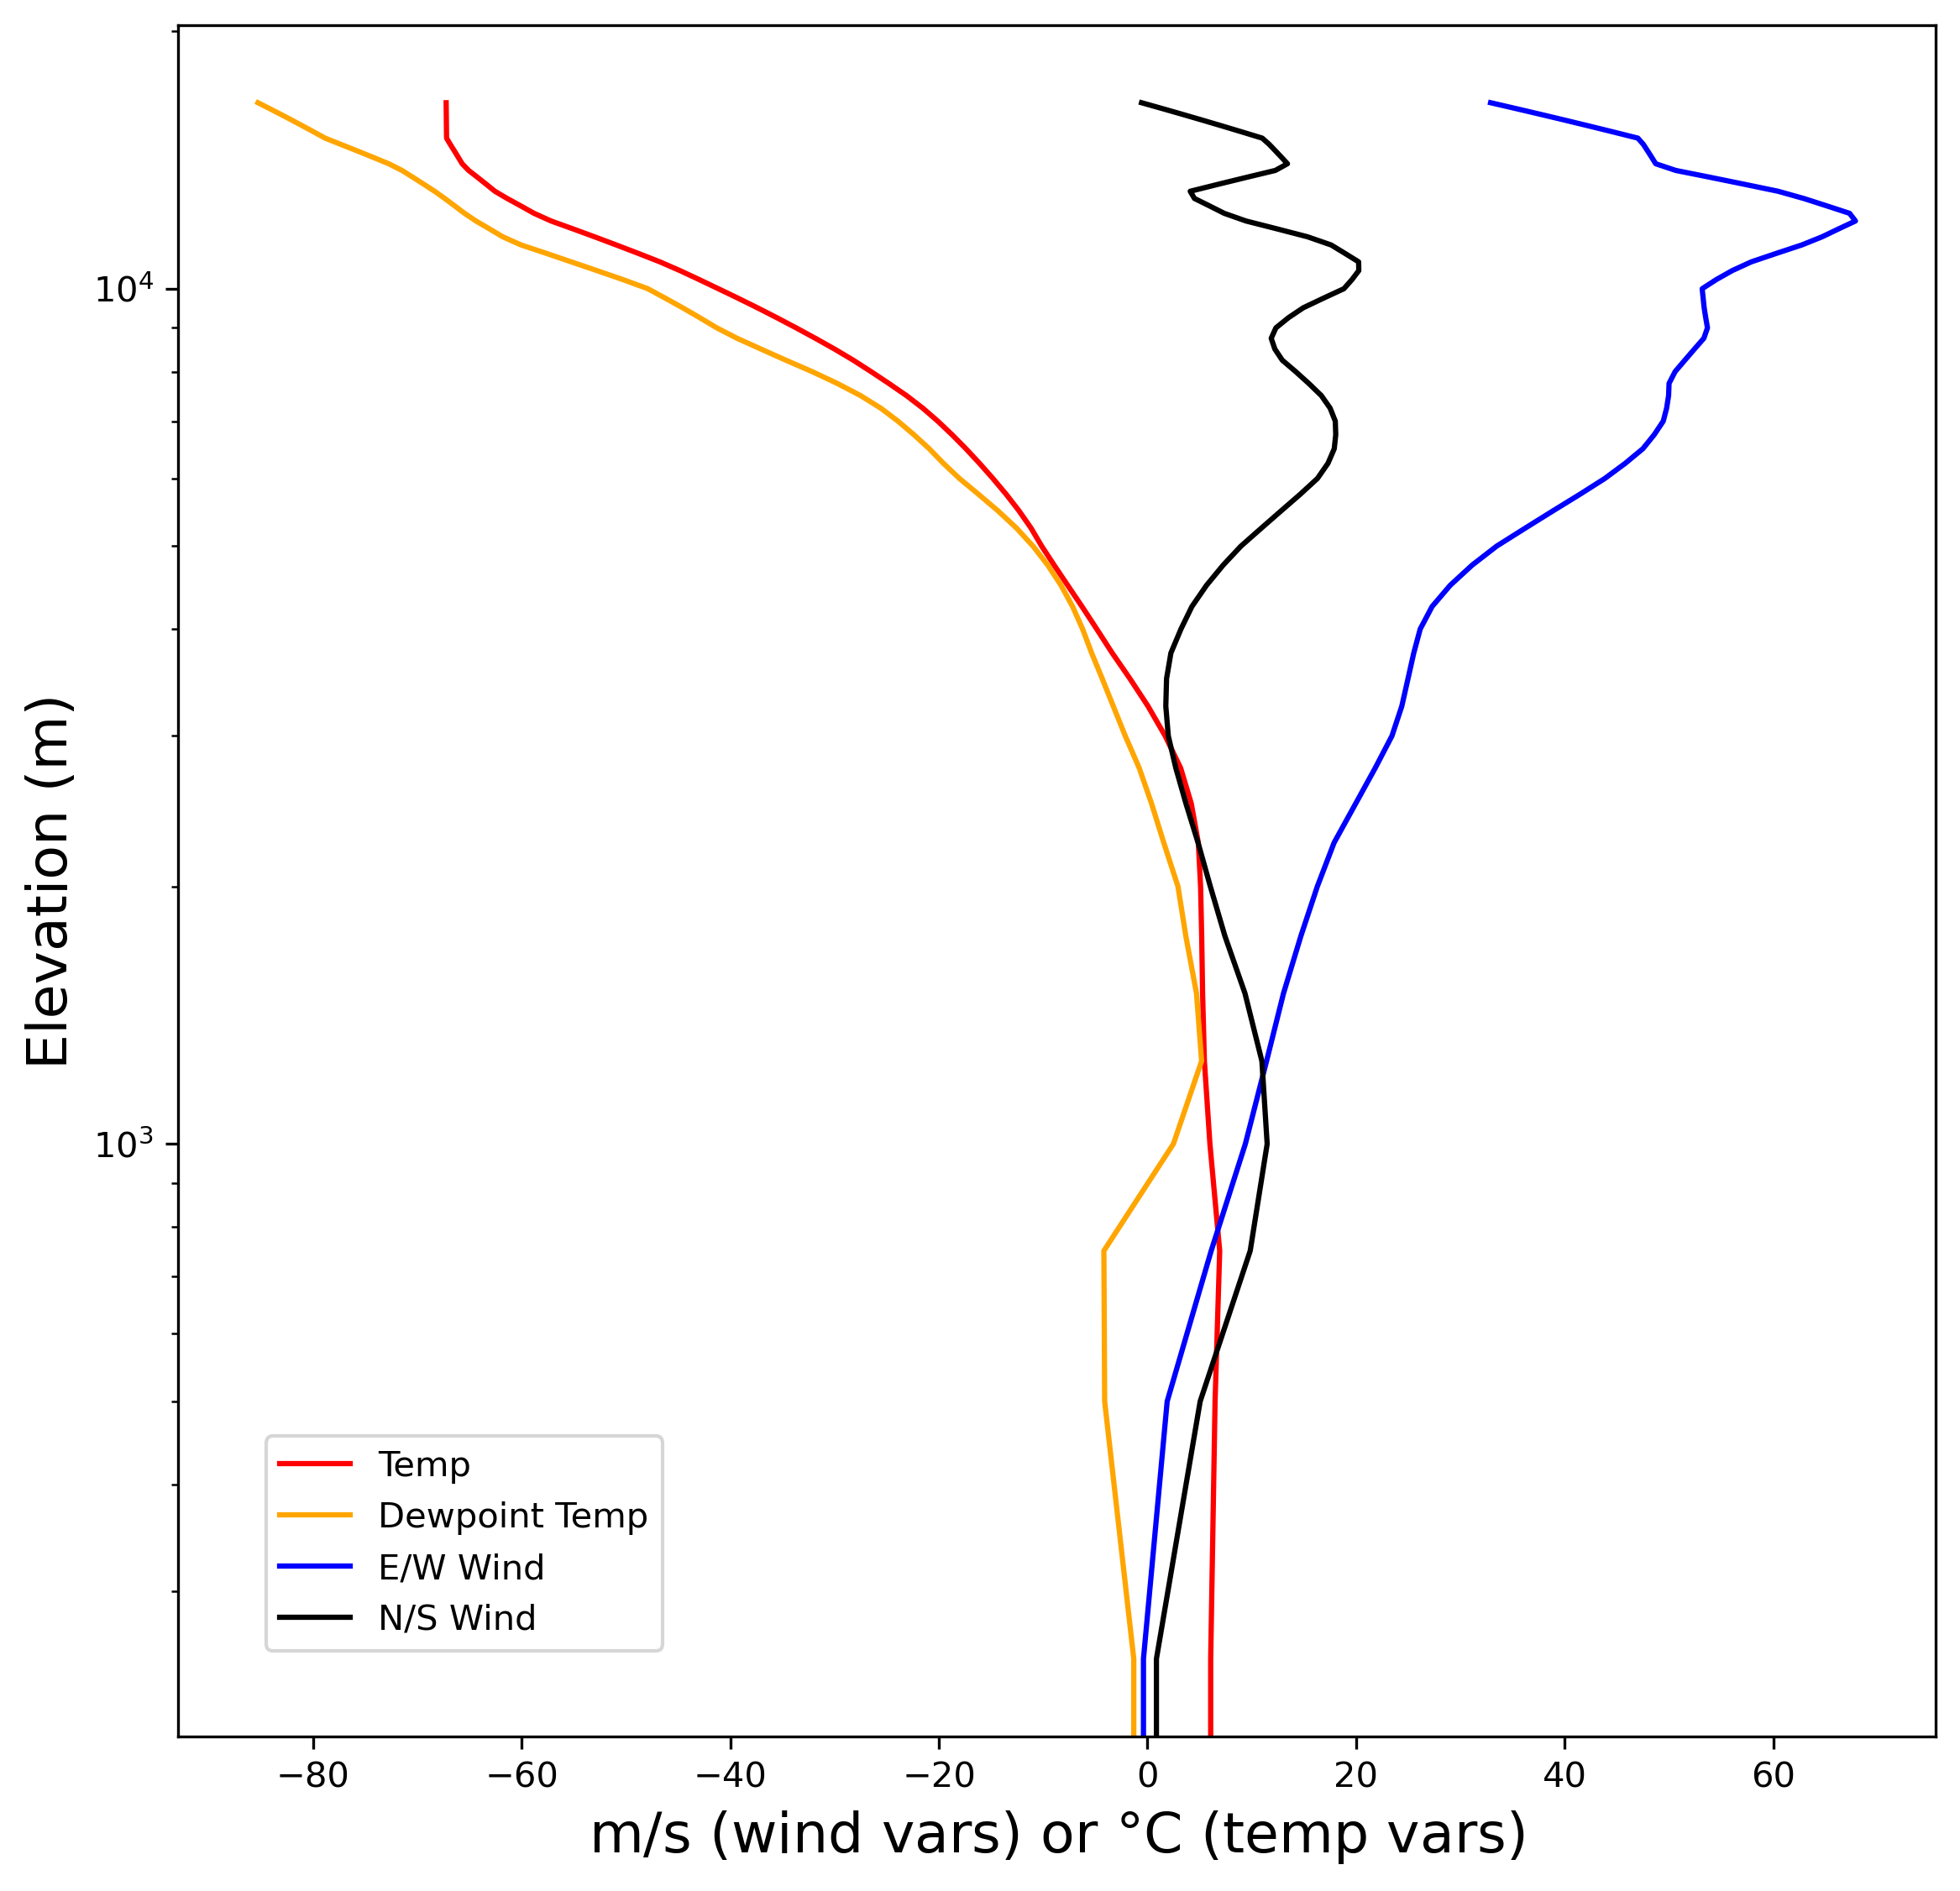

In [72]:
fig, ax = plt.subplots(figsize=(9,9), dpi=300)
# skew = SkewT(fig, rotation=45)
ax.plot(temps.to_numpy()[25], elevations, 'r', label='Temp')
ax.plot(dewtemps.to_numpy()[25], elevations, 'orange', label='Dewpoint Temp')
ax.plot(uwinds.to_numpy()[25], elevations, 'b', label='E/W Wind')
ax.plot(vwinds.to_numpy()[25], elevations, 'k', label='N/S Wind')
ax.legend(loc=(0.05,0.05))
ax.set_yscale('log')
ax.set_ylabel('Elevation (m)', fontsize=16)
ax.set_xlabel('m/s (wind vars) or $\degree$C (temp vars)', fontsize=16) 
plt.show()